## Xerox - Failure Prediction Project

## Data Cleaning

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Asset Table
- Remove rows with NA values

In [2]:
asset = pd.read_csv('Asset_features_RCSD.csv').dropna() 
asset

,AssetNumericID,AssetID,ModelName,ModelClass,IsColor,PPM,ColorPPM,Utilization,IsPrinter,IsScanner,IsCopier,IsFax,ageInMonths
0,1,5489F312-B437-E111-B48F-001B216D5638,WorkCentre 5775 Copier/Printer,SDE_NETWORK_MULTIFUNCTION,0,75,0,1.941107,1,1,1,0,61
1,2,5867F667-82C0-E111-B909-001B216D5638,D110 Copier/Printer with Integrated,SDE_PRODUCTION,0,110,0,3.198006,1,1,1,0,56
2,3,6EE92FBE-884E-E111-BB05-001B216D5638,WorkCentre 5775 Copier/Printer,SDE_NETWORK_MULTIFUNCTION,0,75,0,6.659373,1,1,1,0,60
3,4,C98861AB-A08D-E111-BCB8-001B216D5D05,WorkCentre 5775 Copier/Printer,SDE_NETWORK_MULTIFUNCTION,0,75,0,0.506096,1,1,1,1,58
4,5,6B373B51-99D5-DF11-8543-0024E861B15C,WorkCentre 6400XF-PGPK,SDE_NETWORK_MULTIFUNCTION,1,37,32,0.370249,1,1,1,1,76
5,6,C77B78AC-19DB-DF11-8543-0024E861B15C,ColorQube 9203,SDE_NETWORK_MULTIFUNCTION,1,50,50,5.180484,1,1,1,1,76
6,7,99201344-43FC-DF11-8543-0024E861B15C,WorkCentre 7232,SDE_NETWORK_MULTIFUNCTION,1,40,10,0.091702,1,1,1,1,75
7,8,58ECC94B-610C-E011-8543-0024E861B15C,WorkCentre 5765 Copier/Printer,SDE_NETWORK_MULTIFUNCTION,0,65,0,9.815253,1,1,1,0,74
8,9,406B0D8C-BB12-E011-8543-0024E861B15C,ColorQube 9203,SDE_NETWORK_MULTIFUNCTION,1,50,50,1.945442,1,1,1,1,74
9,10,704334DD-C312-E011-8543-0024E861B15C,ColorQube 9203,SDE_NETWORK_MULTIFUNCTION,1,50,50,2.089886,1,1,1,0,74


### Failure Table
- Regroup Failure Types into 3 groups with similar size
- For those multiple failures happen in one day, join them in one row
- Label new feaure "ProblemOccured" as 1 for those days failure happened

In [3]:
failure = pd.read_csv('Failures_RCSD.csv', names= ['AssetID', 'ReadDate', 'ProblemTypeName'], skiprows=1)
failure['ReadDate'] = pd.to_datetime(failure['ReadDate'], format='%B %d, %Y')
failure

,AssetID,ReadDate,ProblemTypeName
0,0AC7852A-BCDA-E111-AD34-0025B500016E,2012-10-09,Output Quality
1,0AC7852A-BCDA-E111-AD34-0025B500016E,2012-10-22,Output Quality
2,0AC7852A-BCDA-E111-AD34-0025B500016E,2012-12-04,Device Fault
3,0AC7852A-BCDA-E111-AD34-0025B500016E,2013-01-10,Paper Jam
4,0AC7852A-BCDA-E111-AD34-0025B500016E,2013-02-06,Fax Issue
5,0AC7852A-BCDA-E111-AD34-0025B500016E,2013-02-13,Device Fault
6,0AC7852A-BCDA-E111-AD34-0025B500016E,2014-05-13,Damage
7,0AC7852A-BCDA-E111-AD34-0025B500016E,2014-09-03,Paper Jam
8,0AC7852A-BCDA-E111-AD34-0025B500016E,2014-09-22,Paper Jam
9,0AC7852A-BCDA-E111-AD34-0025B500016E,2015-05-01,Output Quality


- Group Failure Types into 3 types: 2 of the most frequent, Device Fault, Papar Jam, and the rest others

In [4]:
for x in range(4033):
    if failure['ProblemTypeName'][x] != "Device Fault" and failure['ProblemTypeName'][x] != "Paper Jam":
        failure['ProblemTypeName'][x] = "Others"

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
failure

,AssetID,ReadDate,ProblemTypeName
0,0AC7852A-BCDA-E111-AD34-0025B500016E,2012-10-09,Others
1,0AC7852A-BCDA-E111-AD34-0025B500016E,2012-10-22,Others
2,0AC7852A-BCDA-E111-AD34-0025B500016E,2012-12-04,Device Fault
3,0AC7852A-BCDA-E111-AD34-0025B500016E,2013-01-10,Paper Jam
4,0AC7852A-BCDA-E111-AD34-0025B500016E,2013-02-06,Others
5,0AC7852A-BCDA-E111-AD34-0025B500016E,2013-02-13,Device Fault
6,0AC7852A-BCDA-E111-AD34-0025B500016E,2014-05-13,Others
7,0AC7852A-BCDA-E111-AD34-0025B500016E,2014-09-03,Paper Jam
8,0AC7852A-BCDA-E111-AD34-0025B500016E,2014-09-22,Paper Jam
9,0AC7852A-BCDA-E111-AD34-0025B500016E,2015-05-01,Others


- Group by ReadDate, for those multiple failures happen in one day, join them in one row

In [6]:
failure= failure.groupby(['AssetID','ReadDate'],as_index=False).agg({'ProblemTypeName': ','.join})
failure['ProblemOccured'] = 1
failure['OccurDay']=failure['ReadDate']
failure

,AssetID,ReadDate,ProblemTypeName,ProblemOccured,OccurDay
0,000C52FB-9DA1-E011-B723-0024E861B15C,2012-11-09,Others,1,2012-11-09
1,000C52FB-9DA1-E011-B723-0024E861B15C,2013-02-05,Others,1,2013-02-05
2,000C52FB-9DA1-E011-B723-0024E861B15C,2013-04-23,Device Fault,1,2013-04-23
3,000C52FB-9DA1-E011-B723-0024E861B15C,2013-07-16,Paper Jam,1,2013-07-16
4,000C52FB-9DA1-E011-B723-0024E861B15C,2013-12-06,Device Fault,1,2013-12-06
5,000C52FB-9DA1-E011-B723-0024E861B15C,2014-01-29,Others,1,2014-01-29
6,000C52FB-9DA1-E011-B723-0024E861B15C,2014-02-25,Others,1,2014-02-25
7,000C52FB-9DA1-E011-B723-0024E861B15C,2014-05-28,Device Fault,1,2014-05-28
8,000C52FB-9DA1-E011-B723-0024E861B15C,2014-06-17,Device Fault,1,2014-06-17
9,000C52FB-9DA1-E011-B723-0024E861B15C,2014-08-06,Device Fault,1,2014-08-06


- This is a sample that shows those rows with multiple problems happened in one day

In [7]:
sample = failure[failure['ProblemTypeName'].str.contains(',')]
sample

,AssetID,ReadDate,ProblemTypeName,ProblemOccured,OccurDay
136,08093182-C3E1-E311-80C2-0025B500016E,2016-01-14,"Others,Device Fault",1,2016-01-14
286,114B8414-3DE0-E111-AD34-0025B500016E,2012-09-25,"Paper Jam,Device Fault",1,2012-09-25
354,15A3A661-ABD1-E111-97B2-0025B500016E,2013-10-22,"Others,Device Fault",1,2013-10-22
412,173B8414-3DE0-E111-AD34-0025B500016E,2014-10-03,"Paper Jam,Others",1,2014-10-03
760,2E3AA535-85D2-E111-97B2-0025B500016E,2012-12-18,"Device Fault,Others",1,2012-12-18
1475,5A7FA538-4EED-E111-AEC9-0025B500016E,2015-01-22,"Paper Jam,Device Fault",1,2015-01-22
1478,5A7FA538-4EED-E111-AEC9-0025B500016E,2015-02-20,"Device Fault,Others",1,2015-02-20
1719,6F35C473-F1E0-E311-80C1-0025B500016E,2014-11-24,"Others,Device Fault",1,2014-11-24
2001,7E1C98B4-56F3-E111-AEC9-0025B500016E,2014-02-13,"Others,Device Fault",1,2014-02-13
2005,7E1C98B4-56F3-E111-AEC9-0025B500016E,2014-05-20,"Others,Device Fault",1,2014-05-20


### Volume Table
- Remove rows with negative records, since negative printing volume doesn't make sense

In [8]:
volume = pd.read_csv('Volume_RCSD.csv')
volume['ReadDate'] = [dt.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p') for x in volume['ReadDate']]
volume = volume[volume['Volume'] > 0]
volume

,AssetID,ReadDate,Volume
0,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-07 19:01:00,257
1,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-06 19:05:00,174
2,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-05 19:01:00,110
3,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-04 19:01:00,68
4,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-03 19:01:00,1
6,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-01 19:05:00,209
7,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-03-31 19:01:00,42
8,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-03-30 19:05:00,248
9,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-03-29 19:01:00,36
10,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-03-28 19:06:00,23


## Feature Engineering

### Merge Tables
- Outer merge Volume and Failure Tables on Asset ID and Date
- Expand Date Column into consecutive Day-by-Day form

In [12]:
df = pd.merge(volume, failure, on=['AssetID', 'ReadDate'], how='outer')
df

,AssetID,ReadDate,Volume,ProblemTypeName,ProblemOccured,OccurDay
0,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-07 19:01:00,257.0,NaN,NaN,NaT
1,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-06 19:05:00,174.0,NaN,NaN,NaT
2,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-05 19:01:00,110.0,NaN,NaN,NaT
3,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-04 19:01:00,68.0,NaN,NaN,NaT
4,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-03 19:01:00,1.0,NaN,NaN,NaT
5,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-04-01 19:05:00,209.0,NaN,NaN,NaT
6,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-03-31 19:01:00,42.0,NaN,NaN,NaT
7,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-03-30 19:05:00,248.0,NaN,NaN,NaT
8,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-03-29 19:01:00,36.0,NaN,NaN,NaT
9,0AC7852A-BCDA-E111-AD34-0025B500016E,2016-03-28 19:06:00,23.0,NaN,NaN,NaT


In [13]:
df_new = df.set_index('ReadDate').groupby('AssetID').resample('1D').reset_index()
df_new

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


,AssetID,ReadDate,Volume,ProblemOccured
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-04,93.0,NaN
1,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-05,NaN,NaN
2,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-06,NaN,NaN
3,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-07,NaN,NaN
4,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-08,NaN,NaN
5,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-09,NaN,NaN
6,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-10,NaN,NaN
7,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-11,63.0,NaN
8,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-12,NaN,NaN
9,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-13,NaN,NaN


### Input Original Features
 - _ProblemOccured_:   Label 0 to those days with no problem happened
 - _Volume_:  Fill 0 if no printing record on that day
 - _OccurDay_:  Indicates the upcoming failure day
 - _SurvivalDay_:  How many days each asset has been survived
 - _Page since Failure_:  How many volume has been printed since the last failure 
 - _CumPage_:  Sumed up by volume records day-by-day 
 - _Age (in month)_:  Start from first record and for each asset sumed up by month

In [14]:
df_all = df_new.merge(failure.ix[:,[0,1,2,4]], on=['AssetID', 'ReadDate'], how='left')
df_all['ProblemOccured']=df_all['ProblemOccured'].fillna(0).astype(int)
df_all['Volume']=df_all['Volume'].fillna(0)
df_all['ProblemTypeName']=df_all['ProblemTypeName'].fillna("Good")
df_all['OccurDay']=df_all['OccurDay'].fillna(method='bfill').fillna(dt.date.today())
df_all['Survival Day'] = df_all.groupby(['AssetID', 'OccurDay']).cumcount() + 1
df_all['CumPage'] = df_all.groupby('AssetID')['Volume'].cumsum().fillna(method='ffill').astype(int)
df_all['Page since Failure'] = df_all.groupby(['AssetID', 'OccurDay'])['Volume'].cumsum().astype(int)
df_all

,AssetID,ReadDate,Volume,ProblemOccured,ProblemTypeName,OccurDay,Survival Day,CumPage,Page since Failure
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-04,93.0,0,Good,2012-11-09,1,93,93
1,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-05,0.0,0,Good,2012-11-09,2,93,93
2,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-06,0.0,0,Good,2012-11-09,3,93,93
3,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-07,0.0,0,Good,2012-11-09,4,93,93
4,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-08,0.0,0,Good,2012-11-09,5,93,93
5,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-09,0.0,0,Good,2012-11-09,6,93,93
6,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-10,0.0,0,Good,2012-11-09,7,93,93
7,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-11,63.0,0,Good,2012-11-09,8,156,156
8,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-12,0.0,0,Good,2012-11-09,9,156,156
9,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-13,0.0,0,Good,2012-11-09,10,156,156


In [15]:
recent = df_all.groupby('AssetID')['ReadDate'].first().to_frame().reset_index()
recent.columns = ['AssetID', 'First Day']
recent

,AssetID,First Day
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-04
1,00A32BAB-BCE5-E111-AEB9-0025B500016E,2012-08-20
2,00EAD915-3CD5-E111-97B2-0025B500016E,2012-07-30
3,00FF0553-D5D1-E111-97B2-0025B500016E,2012-07-23
4,02178C0E-3DE0-E111-AD34-0025B500016E,2012-08-13
5,03E33E7D-AB51-DF11-9752-0024E861B15C,2010-05-03
6,06C69B1B-BCD1-E111-97B2-0025B500016E,2012-07-23
7,08093182-C3E1-E311-80C2-0025B500016E,2014-05-27
8,088B201D-3DE0-E111-AD34-0025B500016E,2012-08-13
9,08E598A3-A5CF-E111-97B2-0025B500016E,2012-07-16


In [16]:
df_all = df_all.merge(recent, on=['AssetID'], how='left')
df_all['age'] = [(1 + df_all['ReadDate'][i].month - df_all['First Day'][i].month + (df_all['ReadDate'][i].year - df_all['First Day'][i].year) * 12) for i in range(len(df_all['ReadDate']))]
df_all

,AssetID,ReadDate,Volume,ProblemOccured,ProblemTypeName,OccurDay,Survival Day,CumPage,Page since Failure,First Day,age
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-04,93.0,0,Good,2012-11-09,1,93,93,2011-07-04,1
1,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-05,0.0,0,Good,2012-11-09,2,93,93,2011-07-04,1
2,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-06,0.0,0,Good,2012-11-09,3,93,93,2011-07-04,1
3,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-07,0.0,0,Good,2012-11-09,4,93,93,2011-07-04,1
4,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-08,0.0,0,Good,2012-11-09,5,93,93,2011-07-04,1
5,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-09,0.0,0,Good,2012-11-09,6,93,93,2011-07-04,1
6,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-10,0.0,0,Good,2012-11-09,7,93,93,2011-07-04,1
7,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-11,63.0,0,Good,2012-11-09,8,156,156,2011-07-04,1
8,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-12,0.0,0,Good,2012-11-09,9,156,156,2011-07-04,1
9,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-13,0.0,0,Good,2012-11-09,10,156,156,2011-07-04,1


In [17]:
df_all = df_all.drop(['OccurDay','First Day'], axis=1)
df_all

,AssetID,ReadDate,Volume,ProblemOccured,ProblemTypeName,Survival Day,CumPage,Page since Failure,age
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-04,93.0,0,Good,1,93,93,1
1,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-05,0.0,0,Good,2,93,93,1
2,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-06,0.0,0,Good,3,93,93,1
3,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-07,0.0,0,Good,4,93,93,1
4,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-08,0.0,0,Good,5,93,93,1
5,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-09,0.0,0,Good,6,93,93,1
6,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-10,0.0,0,Good,7,93,93,1
7,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-11,63.0,0,Good,8,156,156,1
8,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-12,0.0,0,Good,9,156,156,1
9,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-13,0.0,0,Good,10,156,156,1


### K-means Clustering
- Re-group Assets by Clustering Model-Based Features

In [18]:
df_asset = asset[['IsColor', 'PPM', 'ColorPPM','IsPrinter', 'IsScanner', 'IsCopier', 'IsFax']]
df_asset

,IsColor,PPM,ColorPPM,IsPrinter,IsScanner,IsCopier,IsFax
0,0,75,0,1,1,1,0
1,0,110,0,1,1,1,0
2,0,75,0,1,1,1,0
3,0,75,0,1,1,1,1
4,1,37,32,1,1,1,1
5,1,50,50,1,1,1,1
6,1,40,10,1,1,1,1
7,0,65,0,1,1,1,0
8,1,50,50,1,1,1,1
9,1,50,50,1,1,1,0


In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0).fit(df_asset)

In [20]:
label = kmeans.labels_
label

array([1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2,
       2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [21]:
asset['Label'] = label
asset['Label'].value_counts()

2    116
1     90
0     40
Name: Label, dtype: int64

In [22]:
asset_new = asset[['AssetID','Label']]
asset_new

,AssetID,Label
0,5489F312-B437-E111-B48F-001B216D5638,1
1,5867F667-82C0-E111-B909-001B216D5638,1
2,6EE92FBE-884E-E111-BB05-001B216D5638,1
3,C98861AB-A08D-E111-BCB8-001B216D5D05,1
4,6B373B51-99D5-DF11-8543-0024E861B15C,0
5,C77B78AC-19DB-DF11-8543-0024E861B15C,0
6,99201344-43FC-DF11-8543-0024E861B15C,2
7,58ECC94B-610C-E011-8543-0024E861B15C,1
8,406B0D8C-BB12-E011-8543-0024E861B15C,0
9,704334DD-C312-E011-8543-0024E861B15C,0


In [23]:
df_final = df_all.merge(asset_new, on=['AssetID'], how='left')
df_final

,AssetID,ReadDate,Volume,ProblemOccured,ProblemTypeName,Survival Day,CumPage,Page since Failure,age,Label
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-04,93.0,0,Good,1,93,93,1,2
1,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-05,0.0,0,Good,2,93,93,1,2
2,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-06,0.0,0,Good,3,93,93,1,2
3,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-07,0.0,0,Good,4,93,93,1,2
4,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-08,0.0,0,Good,5,93,93,1,2
5,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-09,0.0,0,Good,6,93,93,1,2
6,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-10,0.0,0,Good,7,93,93,1,2
7,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-11,63.0,0,Good,8,156,156,1,2
8,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-12,0.0,0,Good,9,156,156,1,2
9,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-13,0.0,0,Good,10,156,156,1,2


### Create New Features
- Volume in 30 Days
- Volume in 15 Days
- Volume in 7 Days
- Volume in 2 Days (Yesterday & Today)

In [24]:
for i in [2, 7, 15, 30]:
    volume = df_final.groupby('AssetID')['Volume'].rolling(window=i).sum().fillna(method='bfill').to_frame().reset_index()
    df_final['Page %dD'%i]= volume[['Volume']].astype(int)
df_final

,AssetID,ReadDate,Volume,ProblemOccured,ProblemTypeName,Survival Day,CumPage,Page since Failure,age,Label,Page 2D,Page 7D,Page 15D,Page 30D
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-04,93.0,0,Good,1,93,93,1,2,93,93,369,1282
1,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-05,0.0,0,Good,2,93,93,1,2,93,93,369,1282
2,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-06,0.0,0,Good,3,93,93,1,2,0,93,369,1282
3,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-07,0.0,0,Good,4,93,93,1,2,0,93,369,1282
4,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-08,0.0,0,Good,5,93,93,1,2,0,93,369,1282
5,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-09,0.0,0,Good,6,93,93,1,2,0,93,369,1282
6,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-10,0.0,0,Good,7,93,93,1,2,0,93,369,1282
7,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-11,63.0,0,Good,8,156,156,1,2,63,63,369,1282
8,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-12,0.0,0,Good,9,156,156,1,2,63,63,369,1282
9,000C52FB-9DA1-E011-B723-0024E861B15C,2011-07-13,0.0,0,Good,10,156,156,1,2,0,63,369,1282


In [ ]:
# df_final.to_csv('Final Data 5.1.csv', index=False)

In [3]:
df_final = pd.read_csv('Final Data 5.1.csv')
df_final

,AssetID,ReadDate,Volume,ProblemOccured,Survival Day,ProblemTypeName,CumPage,Page since Failure,Age,Label,Page 2D,Page 7D,Page 15D,Page 30D
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/4,93.0,0,1,Good,93,93,1,2,93,93,369,1282
1,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/5,0.0,0,2,Good,93,93,1,2,93,93,369,1282
2,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/6,0.0,0,3,Good,93,93,1,2,0,93,369,1282
3,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/7,0.0,0,4,Good,93,93,1,2,0,93,369,1282
4,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/8,0.0,0,5,Good,93,93,1,2,0,93,369,1282
5,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/9,0.0,0,6,Good,93,93,1,2,0,93,369,1282
6,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/10,0.0,0,7,Good,93,93,1,2,0,93,369,1282
7,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/11,63.0,0,8,Good,156,156,1,2,63,63,369,1282
8,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/12,0.0,0,9,Good,156,156,1,2,63,63,369,1282
9,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/13,0.0,0,10,Good,156,156,1,2,0,63,369,1282


#### Categorical Variables

In [4]:
df_final = pd.get_dummies(df_final, columns = ['Label'], drop_first = True)
df_final

,AssetID,ReadDate,Volume,ProblemOccured,Survival Day,ProblemTypeName,CumPage,Page since Failure,Age,Page 2D,Page 7D,Page 15D,Page 30D,Label_1,Label_2
0,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/4,93.0,0,1,Good,93,93,1,93,93,369,1282,0,1
1,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/5,0.0,0,2,Good,93,93,1,93,93,369,1282,0,1
2,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/6,0.0,0,3,Good,93,93,1,0,93,369,1282,0,1
3,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/7,0.0,0,4,Good,93,93,1,0,93,369,1282,0,1
4,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/8,0.0,0,5,Good,93,93,1,0,93,369,1282,0,1
5,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/9,0.0,0,6,Good,93,93,1,0,93,369,1282,0,1
6,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/10,0.0,0,7,Good,93,93,1,0,93,369,1282,0,1
7,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/11,63.0,0,8,Good,156,156,1,63,63,369,1282,0,1
8,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/12,0.0,0,9,Good,156,156,1,63,63,369,1282,0,1
9,000C52FB-9DA1-E011-B723-0024E861B15C,2011/7/13,0.0,0,10,Good,156,156,1,0,63,369,1282,0,1


### Scikit - Survival Package

### Survival Analysis on Problem Types

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.nonparametric import kaplan_meier_estimator

#### Select ProblemOccured = 1

In [5]:
data = df_final[df_final['ProblemOccured']==1]
data

,AssetID,ReadDate,Volume,ProblemOccured,Survival Day,ProblemTypeName,CumPage,Page since Failure,Age,Page 2D,Page 7D,Page 15D,Page 30D,Label_1,Label_2
494,000C52FB-9DA1-E011-B723-0024E861B15C,2012/11/9,0.0,1,495,Others,15472,15472,17,162,341,640,1260,0,1
582,000C52FB-9DA1-E011-B723-0024E861B15C,2013/2/5,81.0,1,88,Others,20672,5200,20,145,385,849,1578,0,1
659,000C52FB-9DA1-E011-B723-0024E861B15C,2013/4/23,0.0,1,77,Device Fault,23765,3093,22,38,160,585,858,0,1
743,000C52FB-9DA1-E011-B723-0024E861B15C,2013/7/16,108.0,1,84,Paper Jam,27904,4139,25,126,355,486,969,0,1
886,000C52FB-9DA1-E011-B723-0024E861B15C,2013/12/6,45.0,1,143,Device Fault,37969,10065,30,100,297,506,1278,0,1
940,000C52FB-9DA1-E011-B723-0024E861B15C,2014/1/29,181.0,1,54,Others,40739,2770,31,223,333,641,1481,0,1
967,000C52FB-9DA1-E011-B723-0024E861B15C,2014/2/25,0.0,1,27,Others,41755,1016,32,0,120,361,1264,0,1
1059,000C52FB-9DA1-E011-B723-0024E861B15C,2014/5/28,42.0,1,92,Device Fault,48975,7220,35,139,1583,2010,2941,0,1
1079,000C52FB-9DA1-E011-B723-0024E861B15C,2014/6/17,48.0,1,20,Device Fault,50082,1107,36,164,459,860,2844,0,1
1129,000C52FB-9DA1-E011-B723-0024E861B15C,2014/8/6,90.0,1,50,Device Fault,54706,4624,38,341,1116,2023,3769,0,1


#### Scaling

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_attributes = ['CumPage','Page since Failure','Page 2D','Page 7D','Page 15D','Page 30D']

for attribute in num_attributes:
    data[attribute] = scaler.fit_transform(data[[attribute]]).reshape(-1)

#### Go over Problem Type

In [55]:
data["ProblemTypeName"].value_counts()

Device Fault              1513
Paper Jam                 1284
Others                    1186
Others,Device Fault          9
Paper Jam,Device Fault       5
Paper Jam,Others             3
Device Fault,Others          3
Name: ProblemTypeName, dtype: int64

In [116]:
X_labels = [c for c in data.columns if c not in ['ProblemOccured','AssetID','ReadDate','Volume', 'Survival Day']]
X = data.loc[:,X_labels]
X.head()

,ProblemTypeName,CumPage,Page since Failure,Age,Page 2D,Page 7D,Page 15D,Page 30D,Label_1,Label_2
494,Others,0.000867,0.001472,17,0.000404,0.000088,0.000163,0.000316,0,1
582,Others,0.001158,0.000495,20,0.000362,0.000099,0.000217,0.000396,0,1
659,Device Fault,0.001332,0.000294,22,0.000095,0.000041,0.000149,0.000215,0,1
743,Paper Jam,0.001564,0.000394,25,0.000315,0.000091,0.000124,0.000243,0,1
886,Device Fault,0.002128,0.000958,30,0.000250,0.000076,0.000129,0.000321,0,1


In [117]:
Y = data[['ProblemOccured','Survival Day']]
Y['ProblemOccured'] = Y['ProblemOccured'].astype('bool')
Y = Y.to_records(index=False)
Y

rec.array([( True, 495), ( True,  88), ( True,  77), ..., ( True,   3),
           ( True,   3), ( True,  21)], 
          dtype=[('ProblemOccured', '?'), ('Survival Day', '<i8')])

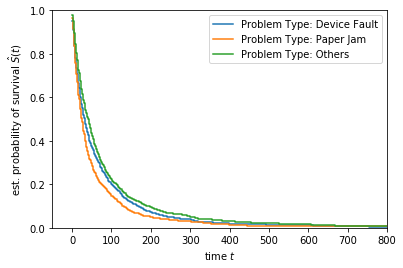

In [63]:
for problemType in ("Device Fault", "Paper Jam", "Others"):
    mark = [problemType in x for x in X["ProblemTypeName"]]
    time_type, survival_prob_type = kaplan_meier_estimator(
        Y["ProblemOccured"][mark],
        Y["Survival Day"][mark])
    
    plt.step(time_type, survival_prob_type, where="post",
             label="Problem Type: %s" %problemType)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")
plt.axis([-50,800,0,1])
plt.savefig('ProblemType.png')

### Coxph Regression Model

In [118]:
X_labels = [c for c in data.columns if c not in ['ProblemOccured','ProblemTypeName','AssetID','ReadDate','Volume', 'Survival Day']]
X = data.loc[:,X_labels]
X.head()

,CumPage,Page since Failure,Age,Page 2D,Page 7D,Page 15D,Page 30D,Label_1,Label_2
494,0.000867,0.001472,17,0.000404,0.000088,0.000163,0.000316,0,1
582,0.001158,0.000495,20,0.000362,0.000099,0.000217,0.000396,0,1
659,0.001332,0.000294,22,0.000095,0.000041,0.000149,0.000215,0,1
743,0.001564,0.000394,25,0.000315,0.000091,0.000124,0.000243,0,1
886,0.002128,0.000958,30,0.000250,0.000076,0.000129,0.000321,0,1


In [119]:
Y = data[['ProblemOccured','Survival Day']]
Y['ProblemOccured'] = Y['ProblemOccured'].astype('bool')
Y = Y.to_records(index=False)
Y

rec.array([( True, 495), ( True,  88), ( True,  77), ..., ( True,   3),
           ( True,   3), ( True,  21)], 
          dtype=[('ProblemOccured', '?'), ('Survival Day', '<i8')])

In [120]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(X, Y)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

In [121]:
pd.Series(estimator.coef_, index=X.columns)

CumPage                2.453819
Page since Failure   -66.035950
Age                   -0.011577
Page 2D                2.080525
Page 7D               23.664653
Page 15D             -22.259579
Page 30D              24.576941
Label_1                0.503682
Label_2               -0.486864
dtype: float64

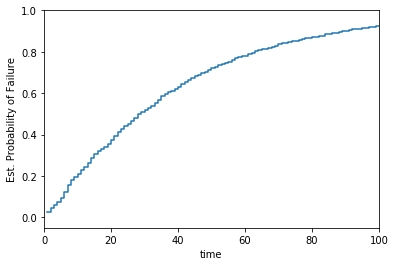

In [122]:
s = estimator.baseline_survival_
plt.step(s.x, 1-s.y, where="post")
plt.axis([0,100,-0.05,1])
plt.ylabel("Est. Probability of Failure")
plt.xlabel("time")
plt.legend(loc="best")

### Measuring the Performance of Survival Models

In [123]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(X)
result = concordance_index_censored(Y['ProblemOccured'], Y['Survival Day'], prediction)
result[0]

0.75101427846402624

In [124]:
estimator.score(X, Y)

0.75101427846402624

### Feature Selection: Which Variable is Most Predictive?

In [125]:
import numpy as np

def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(X.values, Y)
s = pd.Series(scores, index=X.columns).sort_values(ascending=False)
s

Page since Failure    0.697752
Page 30D              0.615801
Page 15D              0.609398
Page 7D               0.597065
CumPage               0.582705
Page 2D               0.581494
Label_1               0.572455
Label_2               0.558846
Age                   0.515093
dtype: float64

Text(0.5,1,'C-Index for Each Individual Variable')

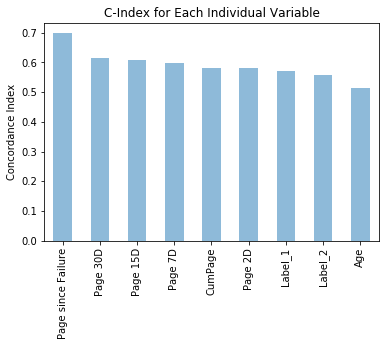

In [126]:
s.plot.bar(align='center', alpha=0.5)
plt.ylabel('Concordance Index')
plt.title('C-Index for Each Individual Variable')

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

pipe = Pipeline([('select', SelectKBest(fit_and_score_features, k=all)),
                 ('model', CoxPHSurvivalAnalysis())])

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {'select__k': np.arange(1, X.shape[1] + 1)}
gcv = GridSearchCV(pipe, param_grid, cv=5)
gcv.fit(X, Y)

results = pd.DataFrame(gcv.cv_results_).sort_values(by='mean_test_score', ascending=False)
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_select__k,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,12.385441,0.035479,0.824623,0.826085,4,{'select__k': 4},1,0.824169,0.827202,0.825413,...,0.821732,0.819787,0.826630,0.825555,0.825175,0.830740,1.004936,0.010823,0.001644,0.003577
1,12.229943,0.041100,0.816202,0.815921,2,{'select__k': 2},2,0.816479,0.814309,0.801496,...,0.827501,0.813197,0.810912,0.809272,0.824627,0.829150,1.023799,0.006172,0.009413,0.006845
2,11.998975,0.029580,0.809116,0.811278,3,{'select__k': 3},3,0.811288,0.810628,0.806522,...,0.805072,0.807169,0.810943,0.807995,0.811759,0.819909,0.680956,0.005353,0.002762,0.004537
4,12.050030,0.030690,0.803421,0.806055,5,{'select__k': 5},4,0.770614,0.787186,0.783083,...,0.814758,0.810870,0.828586,0.823482,0.820115,0.821439,1.115205,0.008071,0.022497,0.015946
5,10.060071,0.031806,0.783574,0.784638,6,{'select__k': 6},5,0.767615,0.787924,0.784427,...,0.769847,0.776368,0.805283,0.785187,0.790736,0.786373,0.733775,0.007748,0.013901,0.004238
6,11.428710,0.033458,0.770800,0.769372,7,{'select__k': 7},6,0.735492,0.775257,0.762893,...,0.763480,0.765612,0.803304,0.765727,0.788896,0.767306,0.909075,0.009693,0.023437,0.003980
7,11.689044,0.028181,0.758470,0.758374,8,{'select__k': 8},7,0.725509,0.764111,0.748466,...,0.743043,0.755320,0.789391,0.755707,0.786015,0.754390,0.436207,0.006675,0.025055,0.004025
8,12.095541,0.029603,0.750991,0.751525,9,{'select__k': 9},8,0.716431,0.757570,0.744663,...,0.731275,0.750421,0.780180,0.749515,0.782481,0.746688,0.676989,0.007676,0.026330,0.003710
0,11.664571,0.036753,0.698627,0.697807,1,{'select__k': 1},9,0.703353,0.697071,0.694614,...,0.712354,0.694034,0.687653,0.700614,0.695143,0.698664,0.944786,0.004820,0.008479,0.002196


Text(0.5,1,'C-Index for Feature Combinations')

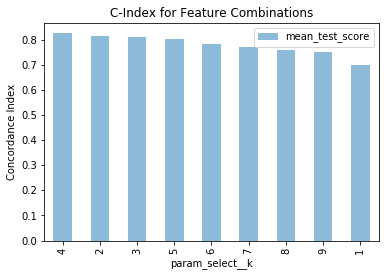

In [75]:
results.plot.bar(x='param_select__k', y='mean_test_score', alpha=0.5)
plt.ylabel('Concordance Index')
plt.title('C-Index for Feature Combinations')

In [129]:
pipe.set_params(**gcv.best_params_)
pipe.fit(X, Y)

Pipeline(memory=None,
     steps=[('select', SelectKBest(k=4,
      score_func=<function fit_and_score_features at 0x00000218B844BAE8>)), ('model', CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0))])

In [130]:
transformer, final_estimator = [s[1] for s in pipe.steps]
pd.Series(final_estimator.coef_, index=X.columns[transformer.get_support()])

Page since Failure   -46.038399
Page 7D               16.807264
Page 15D             -17.272574
Page 30D              21.046511
dtype: float64

In [131]:
pipe.score(X, Y)

0.8270941313570187

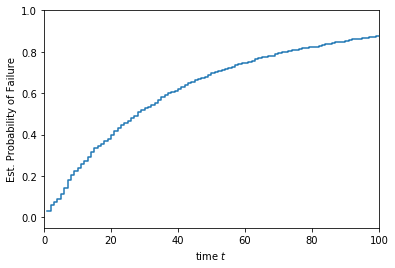

In [137]:
f = final_estimator.baseline_survival_
plt.step(f.x, 1-f.y, where="post")
plt.axis([0,100,-0.05,1])
plt.ylabel("Est. Probability of Failure")
plt.xlabel("time $t$")
plt.legend(loc="best")

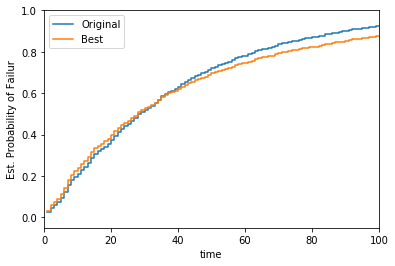

In [138]:
f = final_estimator.baseline_survival_
s = estimator.baseline_survival_
plt.step(s.x, 1-s.y, where="post", label="Original")
plt.step(f.x, 1-f.y, where="post", label="Best")
plt.axis([0,100,-0.05,1])
plt.ylabel("Est. Probability of Failur")
plt.xlabel("time")
plt.legend(loc="best")

### Test New Asset

In [178]:
x_new = pd.DataFrame.from_items(
    [(1, [500000, 100000, 25, 2000, 8000, 40000, 8000, 0, 1])],
     columns=X.columns, orient='index')
x_new

,CumPage,Page since Failure,Age,Page 2D,Page 7D,Page 15D,Page 30D,Label_1,Label_2
1,500000,100000,25,2000,8000,40000,8000,0,1


In [179]:
num_attributes = ['CumPage','Page since Failure','Page 2D','Page 7D','Page 15D','Page 30D']

for attribute in num_attributes:
    x_new[attribute] = scaler.transform(x_new[[attribute]]).reshape(-1)

In [180]:
x_new

,CumPage,Page since Failure,Age,Page 2D,Page 7D,Page 15D,Page 30D,Label_1,Label_2
1,0.125425,0.025085,25,0.000502,0.002007,0.010034,0.002007,0,1


In [181]:
test_column = X.columns[transformer.get_support()]

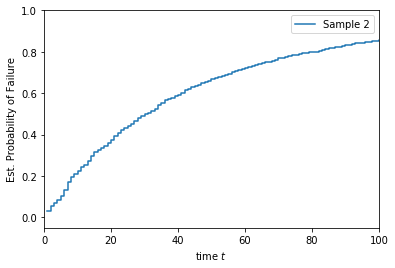

In [182]:
pred_surv = final_estimator.predict_survival_function(x_new[test_column])
plt.step(c.x, 1-c.y, where="post", label="Sample %d" % (i + 1))
plt.axis([0,100,-0.05,1])
plt.ylabel("Est. Probability of Failure")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [172]:
# Day you want to estimatie
c.x[9]

10

In [183]:
# Failure Probability on that Day
1-c.y[9]

0.22414626866620657